## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [48]:
import pandas as pd

In [49]:
std = pd.read_csv('students-data.csv',sep=';')
std.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [50]:
print(std.info())
std.index.name = 'number'
std.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [51]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [52]:
std.isnull().sum().sum()

0

In [53]:
std.isna().sum().sum()

0

### With the above descriptive analysis we can say that there is no missing value in given data set 

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [54]:
std_cat = std.select_dtypes(include = 'object')

#### List of categorical columns

In [55]:
std_cat.columns
std_catcol = list(std_cat.columns)
std_catcol

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [56]:
std.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [57]:
std = std.drop(std.var()[std.var()<1].index,axis=1)
std.shape

(395, 27)

### traveltime, studytime, failures, famrel, freetime, Dalc attribute having variance less than 1 so we are droping this attributes.

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
std[std_catcol] = std[std_catcol].apply(lambda col: le.fit_transform(col))
std.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [58]:
import numpy as np
std['G1']  = np.where(std['G1']>=10,1,0) # discretaizing the continuous 
std['G2']  = np.where(std['G2']>=10,1,0)
std['G3']  = np.where(std['G3']>=10,1,0)

In [59]:
std.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,0,0,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,0,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,0,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,0,1,1
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,1,1,1
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,1,1,1
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,0,0,0
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,1,1,1


### Grade columns G1,G2,G3 has been encoded based on condition (G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0))

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [61]:
X = std.drop(columns= 'G3')  ## Input Variables 
y = std['G3']  ## Target Variable

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

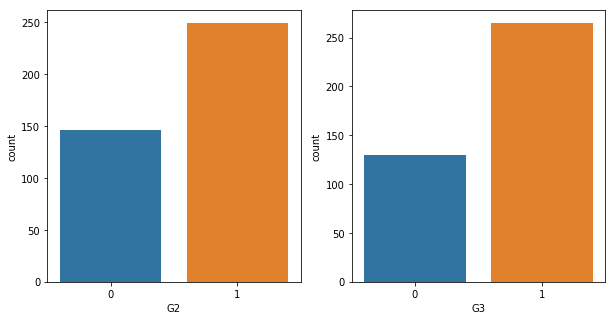

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(10,5), ncols=2, nrows=1) # creating the space for two graphs 
sns.countplot(std['G2'],ax=axs[0])
sns.countplot(std['G3'],ax=axs[1])

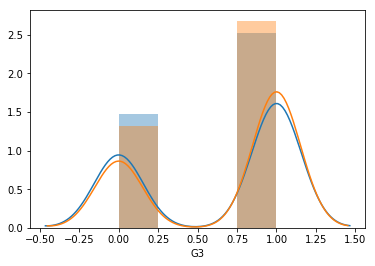

In [14]:
#std.groupby('G1').count()
sns.distplot(std['G2'])
sns.distplot(std['G3'])

# Conclusion for G2 and G3
- Most of the Student who passed the G2 exam have passed in the G3 exam also which we have to predict 
- Distribution of G2 and G3 are almost similar


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [15]:
std.groupby('school').count()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
school,,,,,,,,,,,,,,,,,,,,,
0,349,349,349,349,349,349,349,349,349,349,...,349,349,349,349,349,349,349,349,349,349
1,46,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46


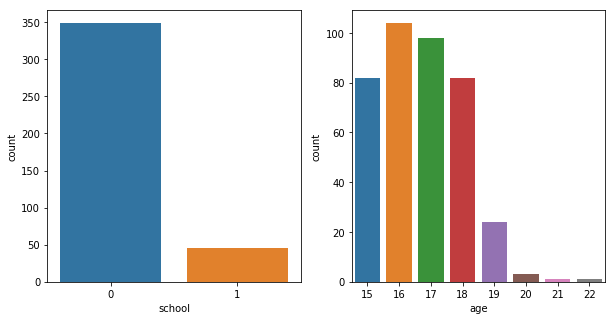

In [16]:
fig, axs = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
sns.countplot(std['school'],ax=axs[0])
sns.countplot(std['age'],ax=axs[1])

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=15)
print ("Training data shape ",X_train.shape)
print ("Testing data shape ",X_test.shape)

Training data shape  (300, 26)
Testing data shape  (95, 26)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression() # Instantiating the LogisticRegression object
lr.fit(X_train, y_train) # logreg object performing fit method on X_train, y_train to learn the relation between them
print (lr.intercept_)   # logreg object created line's intercept 
print ("intercept ",lr.coef_)

[0.29743347]
intercept  [[ 0.09682703 -0.01767193 -0.11535782  0.16233611 -0.12632488 -0.55788096
   0.067779   -0.37737566 -0.10809343  0.06771529  0.07891125  0.12450277
   0.10527901 -0.04862519  0.02995861  0.41852677  0.12748365  0.47193803
   0.66732275 -0.65492384 -0.58761353  0.57935894  0.0598059  -0.00961217
   1.65867593  3.77424998]]


C:\Users\Bhagoda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
score = lr.score(X_test, y_test)  # logreg object performing score method on (X_test, y_test) to give accuracy 
y_pred = lr.predict(X_test)# logreg object performing score method on (X_test) to give prediction 
print ("Training accuracy = ",lr.score(X_train, y_train))
print ("Testing accuracy = " , score)

Training accuracy =  0.93
Testing accuracy =  0.9052631578947369


In [21]:
from sklearn.metrics import f1_score
print (f1_score(y_test, y_pred.round()))

0.9291338582677167


# Naive bayes with Iris data

### Import Iris.csv

In [22]:
iris = pd.read_csv ('iris.csv')  
iris = iris.drop(columns= 'Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Id column has been droped from iris dataset

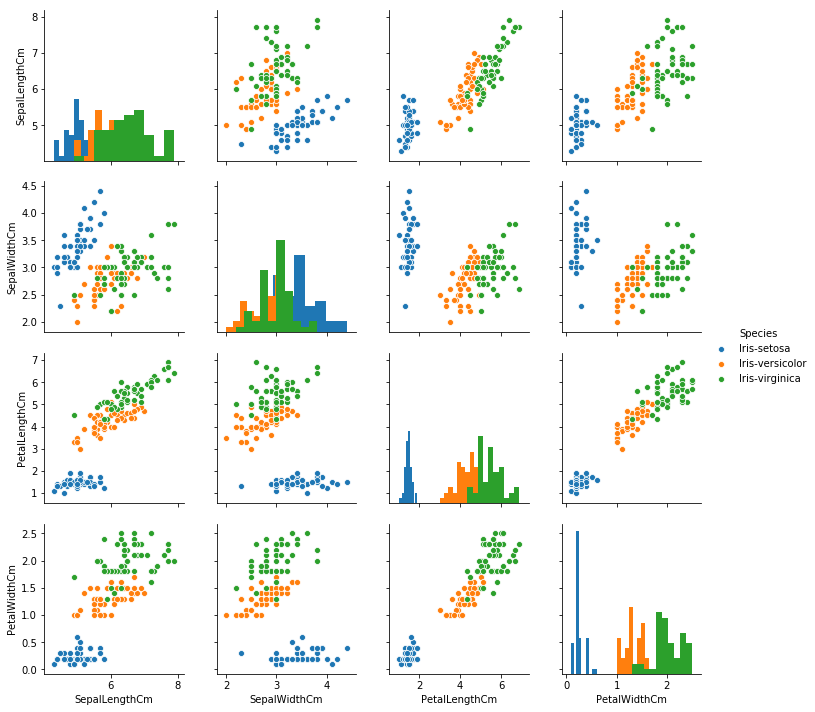

In [64]:
sns.pairplot(iris,hue="Species", diag_kind= 'hist');

In [65]:
iris.isnull().sum() # checking null value in coloumns from our data 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [66]:
iris["SepalLengthCm"] = iris["SepalLengthCm"].fillna( iris["SepalLengthCm"].median()) # repalcing NaN values by its columns median
iris["SepalWidthCm"] = iris["SepalWidthCm"].fillna( iris["SepalWidthCm"].median())
iris["PetalLengthCm"] = iris["PetalLengthCm"].fillna( iris["PetalLengthCm"].median())
iris["PetalWidthCm"] = iris["PetalWidthCm"].fillna(iris["PetalWidthCm"].median())
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [68]:
iris_X = iris.drop(columns='Species')
iris_y = iris['Species']

### Find the distribution of target variable (Class)

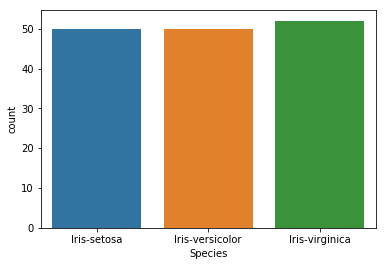

In [69]:
sns.countplot(iris['Species'])

### Plot the distribution of target variable using histogram

Iris-virginica     52
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

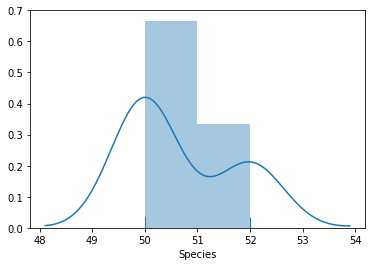

In [70]:
sns.distplot(pd.value_counts(iris["Species"]), kde=True, rug=True);
#sns.catplot(x="Species",kind="count", data=iris);
pd.value_counts(iris["Species"])

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

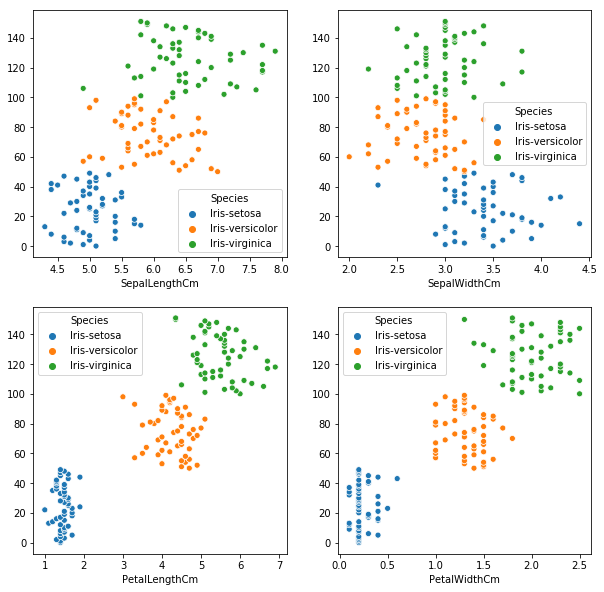

In [72]:
num = range(len(iris['SepalLengthCm']))
fig, axs = plt.subplots(figsize=(10,10), ncols=2, nrows=2)
sns.scatterplot(iris['SepalLengthCm'],num,hue=iris['Species'], ax=axs[0,0])  # 0 = Iris-setosa
sns.scatterplot(iris['SepalWidthCm'],num,hue=iris['Species'],ax=axs[0,1])    # 1 = Iris-versicolo
sns.scatterplot(iris['PetalLengthCm'],num,hue=iris['Species'],ax=axs[1,0])   # 2 = Iris-virginica
sns.scatterplot(iris['PetalWidthCm'],num,hue=iris['Species'],ax=axs[1,1])

## Insights from Scatter Plot
- Petal length and Petal width can be good feature for classificaton 
- Iris -setosa has sepeal length small and sepal width is large 
- Iris -setosa has petal length small and petal width is small 
- Iris -versicolor has speal length medium and sepal width is medium
- Iris -versicolor has petal length medium and petal width is medium
- Iris -verginica has speal length large and sepal width is medium
- Iris -verginica has petal length large and petal width is large
- Sepal width is not a good feature for classification as compared to others

### Summary Statistics and explain insights for at least 2 variables

In [30]:
iris.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.3,1.30,1.8,2.5


# Insight of iris data

- Sepal width is having normal distributtion as it's standard deviation is very small. i.e. all other values of Sepal width close to mean value.
- Sepal length is having normal distributtion as it's standard deviation is very small. i.e. all other values of Sepal width close to mean value.
- Mean and Median value of Sepal width and Sepal Length are almost similar so there is no outliers for this two attributes.
- petal length may have outliers on lower side as minimum values and mean has more diffrence then its higher value
- petal width may have outliers on upper side as minimum values and mean has less diffrence then its higher value

### Correlation among all variables and give your insights

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


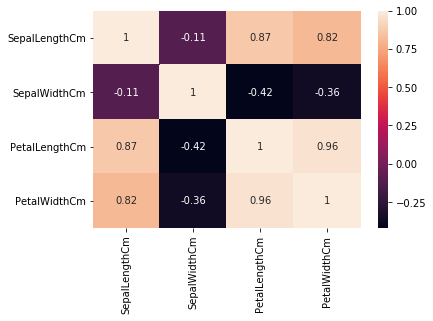

In [31]:
sns.heatmap(iris.corr(),annot=True)
iris.corr()

## Insights from correlation 

- Sepal lenght have higher correlation with petal width and petal length
- petal lenght and petal width are also correlated with good degree
- Positive and Negative correlation is ovsevalbe in correlation heatmap
- we can obsever negative correlation also of very weak degree

### Split data in Training and Validation in 80:20

In [76]:
from sklearn.model_selection import train_test_split  # importing library 
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.2, random_state=15) # spliting the data
print ("shape of training set",iris_X_train.shape) # shape of training
print ("shape of testing set",iris_X_test.shape) # shape of test

shape of training set (121, 4)
shape of testing set (31, 4)


### Do Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler # Using Standard Scalar for Scaling
sc = StandardScaler()  # Instantiating StandardScaler object
sc.fit(iris_X_train)
scaled_iris_X_train = sc.transform(iris_X_train) 
scaled_iris_X_test = sc.transform(iris_X_test) 

### Train and Fit NaiveBayes Model

In [80]:
from sklearn.naive_bayes import GaussianNB  # Importing gaussianNB 
model = GaussianNB() # Instantiating GaussianNB object
model.fit(scaled_iris_X_train, iris_y_train) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
predicted = model.predict(scaled_iris_X_test)

In [86]:
from sklearn import metrics
print(metrics.classification_report(iris_y_test, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.92      0.96        12

      micro avg       0.97      0.97      0.97        31
      macro avg       0.97      0.97      0.97        31
   weighted avg       0.97      0.97      0.97        31



### Print Accuracy and Confusion Matrix and Conclude your findings

In [83]:
(metrics.confusion_matrix(iris_y_test, predicted))

array([[ 8,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 11]], dtype=int64)

In [85]:
model.score(scaled_iris_X_test,iris_y_test)

0.967741935483871

In [84]:
model.score(scaled_iris_X_train,iris_y_train)

0.9421487603305785